## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import zipfile
# Computational libraries
import numpy as np
import pandas as pd


# Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Importing Sampling Library
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
from collections import Counter
from numpy import argmax
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

## Exploratory data analysis

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
train = df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)

(284807, 31)


In [4]:
# observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Let's check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Good No Null Values!
df.isnull().sum().max()

0

Here we will observe the distribution of our classes

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

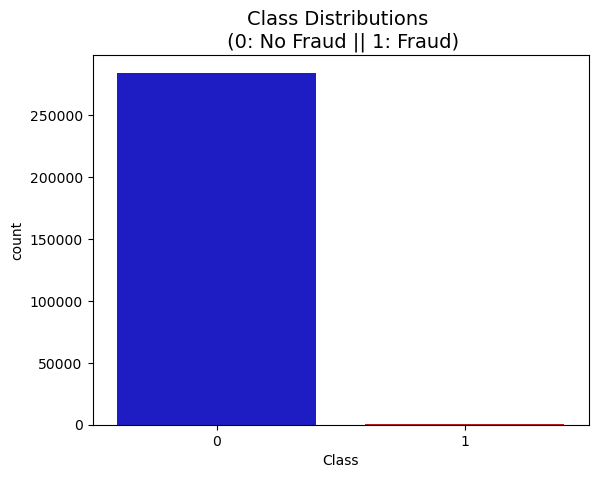

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


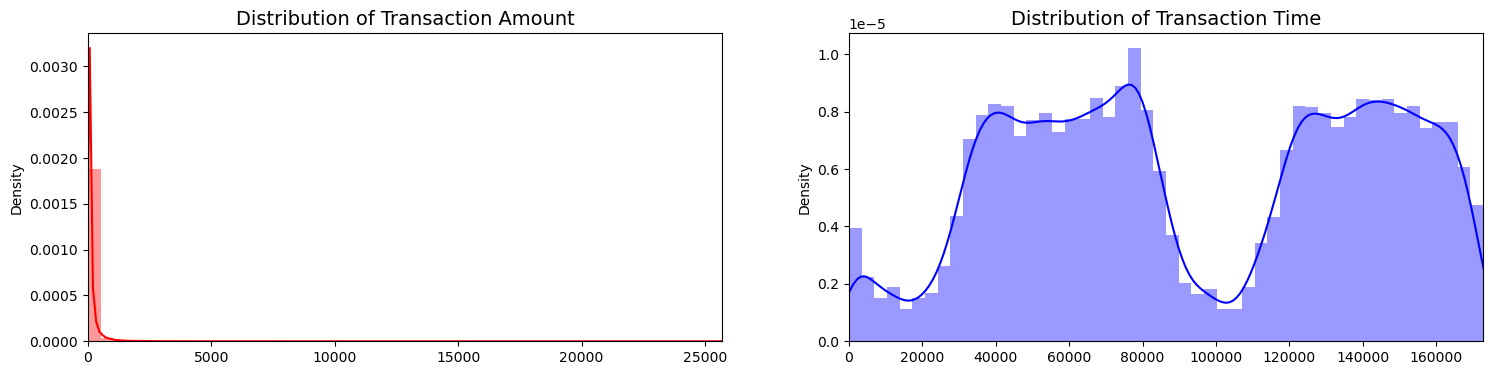

In [10]:
# Create a scatter plot to observe the distribution of classes with time
# import matplotlib.pyplot as plt
# plt.scatter(df['Time'], df['Class'])
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [11]:
# Drop unnecessary columns
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783,-0.995,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0
1,-0.270,-0.995,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0
2,4.984,-0.995,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0
3,1.418,-0.995,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0
4,0.671,-0.995,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0


### Splitting the data into train & test data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Train: [     0      1      2 ... 284804 284805 284806] Test: [     7      9     35 ... 284739 284770 284778]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     10     16 ... 284772 284793 284799]
Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     13 ... 284774 284776 284792]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    23     28     32 ... 284786 284797 284801]
Train: [     1      2      3 ... 284801 284803 284805] Test: [     0     12     20 ... 284802 284804 284806]
Train: [     0      1      2 ... 284803 284804 284806] Test: [     3      4      6 ... 284780 284781 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    14     27     33 ... 284790 284795 284796]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    19     66     76 ... 284784 284788 284800]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    11     15     22 ... 284765 284785 284789]
Train: [     0     

##### Preserve X_test & y_test to evaluate on the test data once you build the model

### Plotting the distribution of a variable

<Figure size 640x480 with 0 Axes>

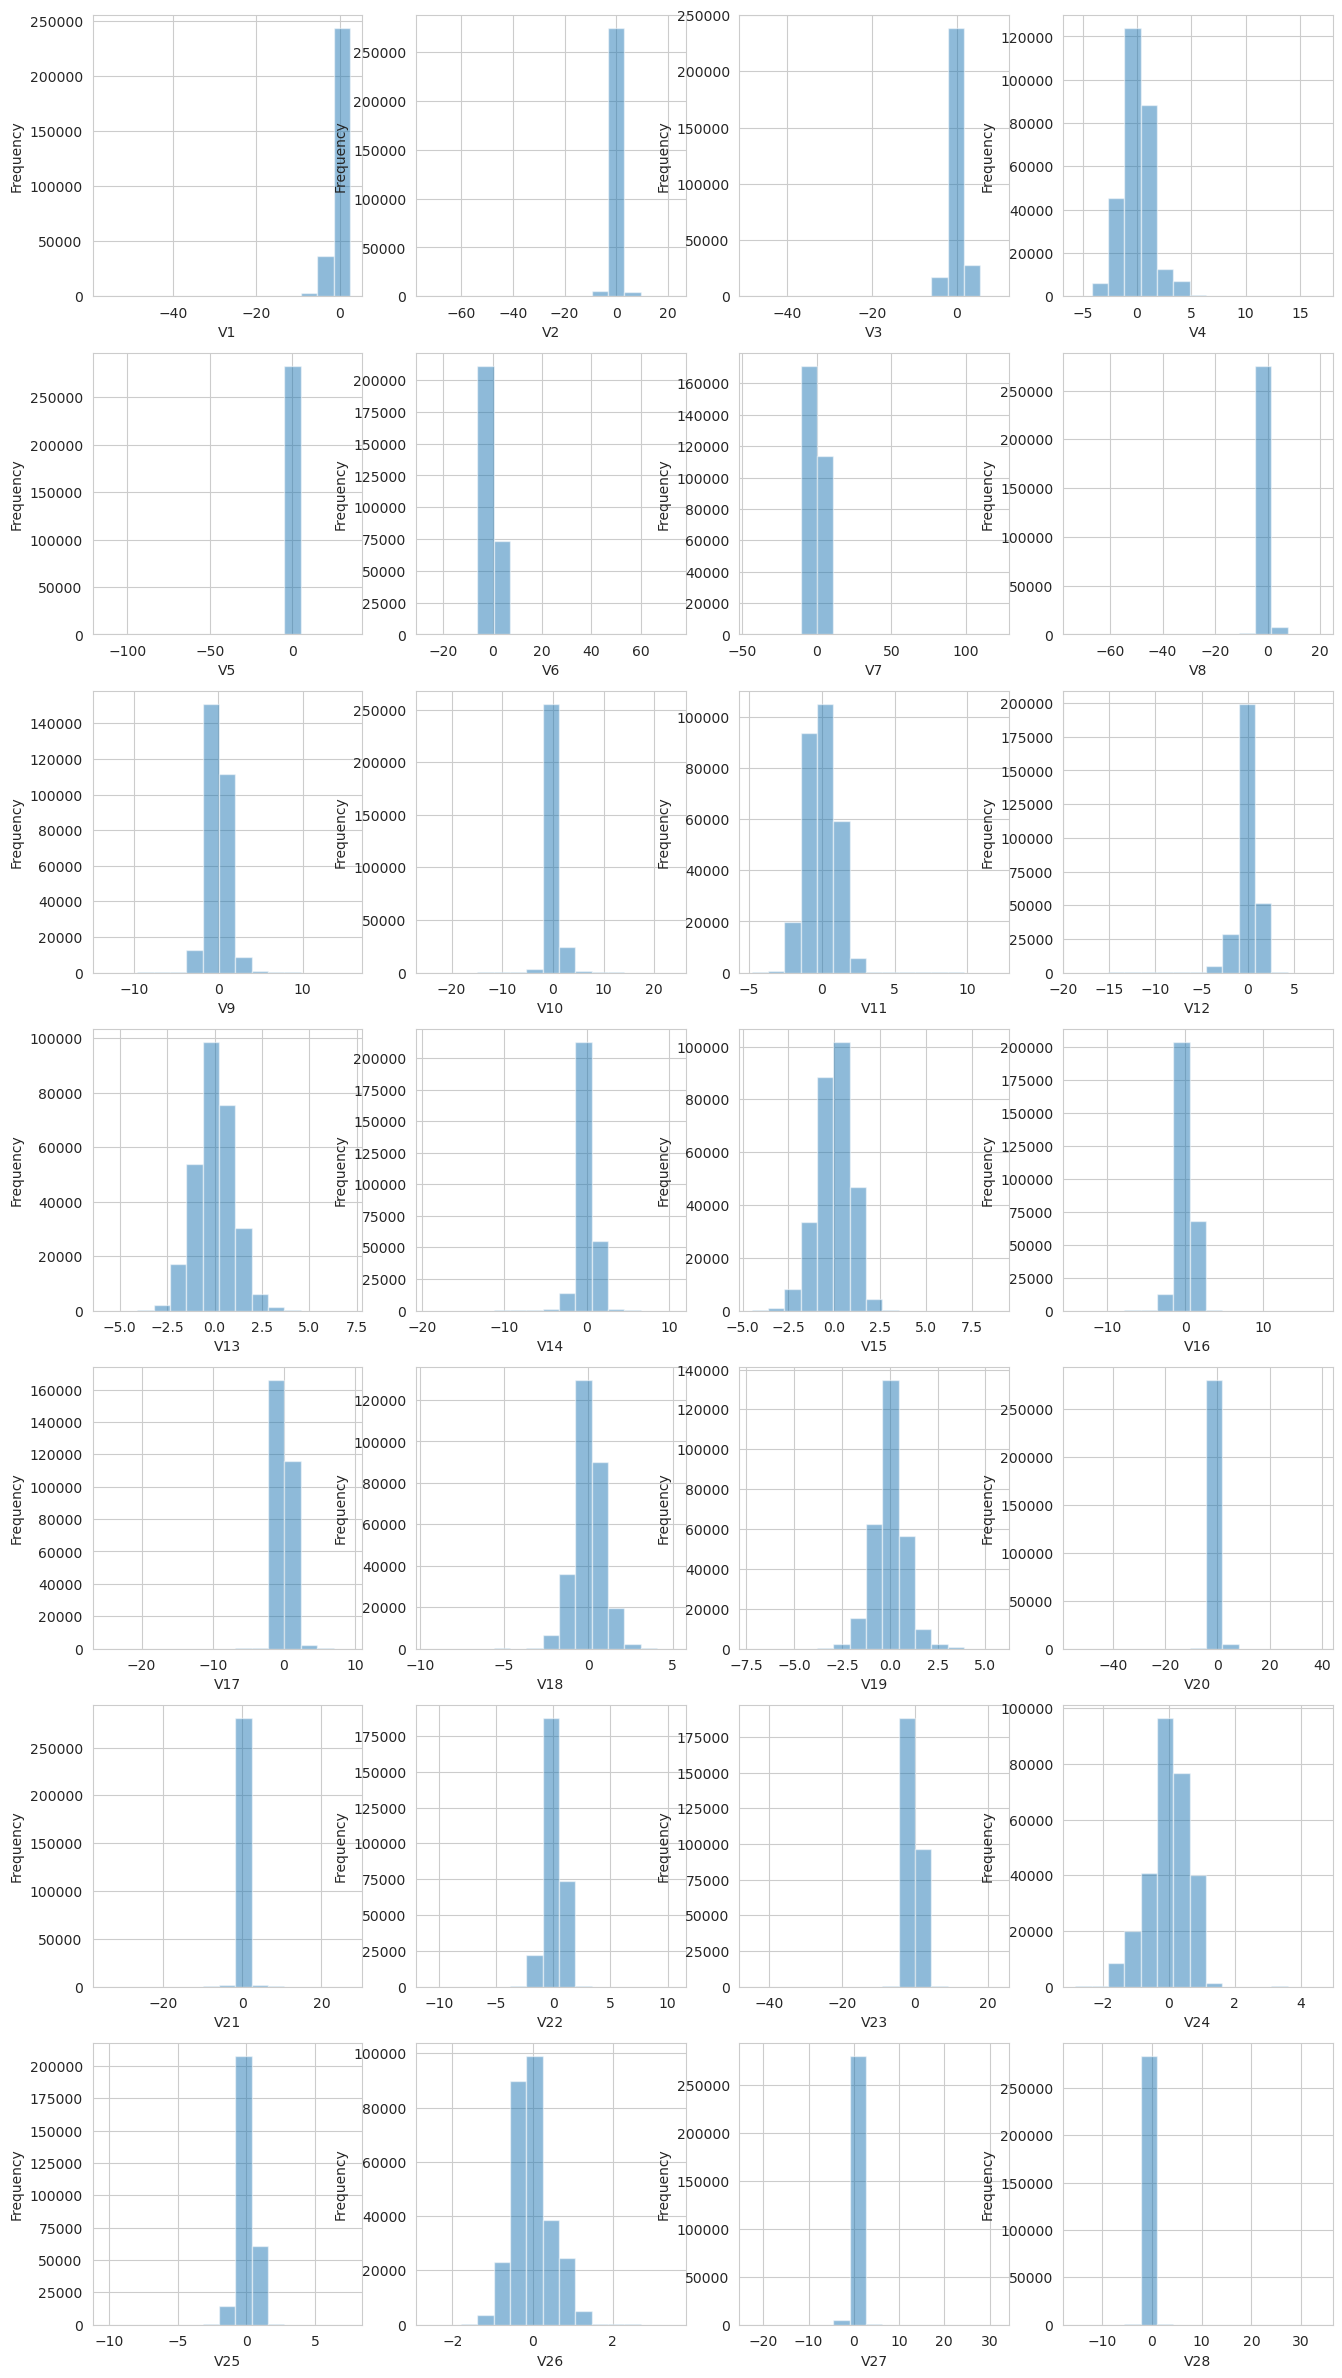

In [14]:
# plot the histogram of a variable from the dataset to see the skewness

#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    df[feature].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
    plt.xlabel(feature, fontsize=10)

plt.show();


In [15]:
from scipy import stats
from scipy.stats import norm, skew 
skewed_feats = df[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
display(skewness)


Skew in numerical features: 



,Skew
V28,11.192
V21,3.593
V7,2.554
V6,1.827
V10,1.187
V4,0.676
V26,0.577
V9,0.555
V11,0.357
V19,0.109


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 28 skewed numerical features to Box Cox transform


<Figure size 640x480 with 0 Axes>

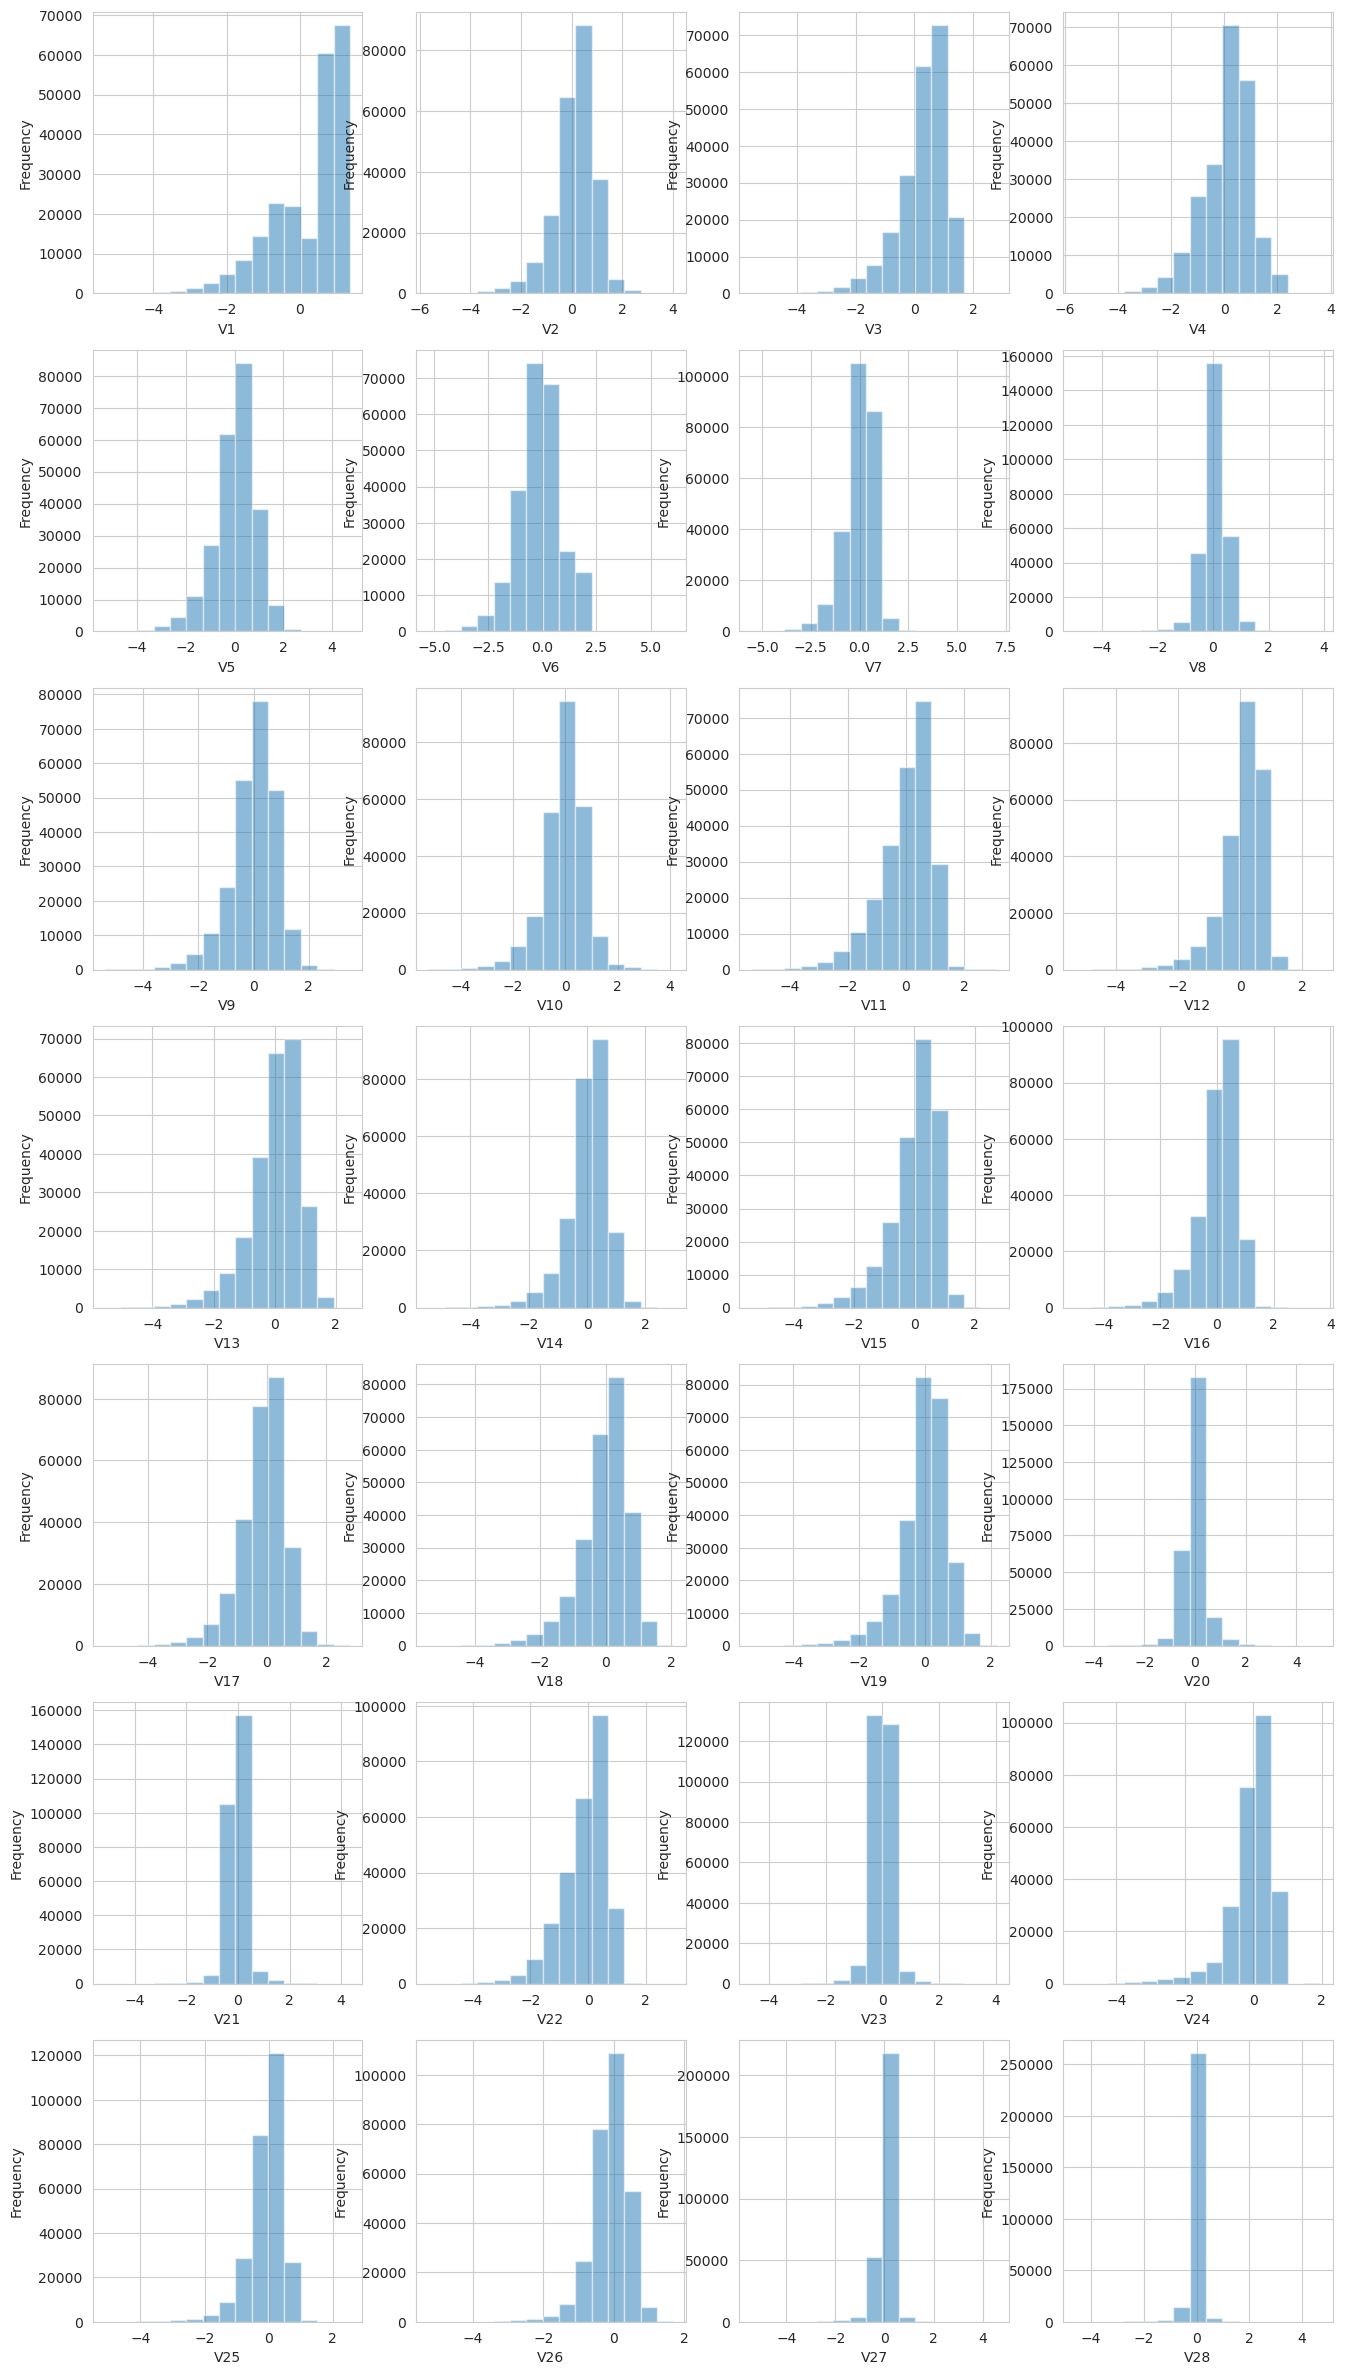

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness

#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    df[feature].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
    plt.xlabel(feature, fontsize=10)

plt.show();

## Model Building
- Build different models on the imbalanced dataset and see the result

# Data Preparation 

In [18]:
#Dropping Time variable as we cannot infer anything from this
train.drop('Time',axis =1, inplace = True)

#splitting the target variable and independent variables
y = train.pop('Class')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y,random_state = 42)

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


## Scale data

In [20]:
sc = StandardScaler()
X_train['Amount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = sc.transform(X_test['Amount'].values.reshape(-1,1))
X_train.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,227845.000,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,227845.000,2.278e+05,2.278e+05,2.278e+05,227845.000,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05
mean,7.953e-04,-4.810e-04,-3.830e-04,-1.972e-05,1.746e-04,-0.001,7.674e-05,-4.339e-04,7.018e-04,-3.894e-04,-7.872e-04,0.003,-4.931e-04,-5.862e-05,7.441e-04,-0.001,3.902e-04,5.624e-05,6.635e-04,-9.989e-04,3.697e-04,3.027e-04,5.039e-05,-2.773e-04,-6.554e-04,1.261e-04,-7.047e-05,1.537e-04,-2.021e-17
std,1.959e+00,1.649e+00,1.515e+00,1.416e+00,1.380e+00,1.331,1.238e+00,1.191e+00,1.097e+00,1.086e+00,1.019e+00,0.997,9.941e-01,9.560e-01,9.151e-01,0.874,8.442e-01,8.389e-01,8.139e-01,7.708e-01,7.350e-01,7.257e-01,6.274e-01,6.053e-01,5.212e-01,4.819e-01,4.049e-01,3.269e-01,1.000e+00
min,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-26.161,-4.356e+01,-7.322e+01,-1.343e+01,-2.459e+01,-4.797e+00,-18.684,-5.792e+00,-1.921e+01,-4.499e+00,-14.130,-2.516e+01,-9.499e+00,-7.214e+00,-5.450e+01,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,-3.517e-01
25%,-9.199e-01,-5.988e-01,-8.918e-01,-8.471e-01,-6.921e-01,-0.769,-5.535e-01,-2.078e-01,-6.403e-01,-5.357e-01,-7.618e-01,-0.402,-6.486e-01,-4.258e-01,-5.826e-01,-0.469,-4.834e-01,-4.991e-01,-4.550e-01,-2.117e-01,-2.282e-01,-5.421e-01,-1.619e-01,-3.548e-01,-3.169e-01,-3.265e-01,-7.074e-02,-5.293e-02,-3.292e-01
50%,1.869e-02,6.475e-02,1.799e-01,-2.136e-02,-5.476e-02,-0.274,4.042e-02,2.322e-02,-5.065e-02,-9.333e-02,-3.142e-02,0.142,-1.435e-02,4.957e-02,4.840e-02,0.065,-6.555e-02,-3.484e-03,5.351e-03,-6.261e-02,-2.928e-02,6.599e-03,-1.098e-02,4.078e-02,1.608e-02,-5.162e-02,1.463e-03,1.122e-02,-2.639e-01
75%,1.316e+00,8.039e-01,1.026e+00,7.423e-01,6.113e-01,0.398,5.705e-01,3.278e-01,5.983e-01,4.545e-01,7.375e-01,0.620,6.619e-01,4.921e-01,6.495e-01,0.522,4.001e-01,5.004e-01,4.598e-01,1.327e-01,1.864e-01,5.283e-01,1.476e-01,4.390e-01,3.499e-01,2.408e-01,9.118e-02,7.812e-02,-4.262e-02
max,2.452e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,73.302,1.206e+02,2.001e+01,1.559e+01,2.375e+01,1.202e+01,7.848,7.127e+00,1.053e+01,8.878e+00,17.315,9.254e+00,5.041e+00,5.572e+00,3.942e+01,2.720e+01,1.050e+01,2.253e+01,4.585e+00,6.071e+00,3.517e+00,3.161e+01,3.385e+01,1.021e+02


# ## Model building - Imbalanced Dataset

## LOGISTIC REGRESSION

In [21]:
# Logistic Regression
logistic = LogisticRegression(solver = 'saga', random_state = 42)

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.005, 0.006]}

# create 5 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)

log_reg.fit(X_train, y_train)

print(log_reg.best_estimator_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('logistic',
                 LogisticRegression(C=0.006, random_state=42, solver='saga'))])


In [22]:
# print best hyperparameters
print("Best ROC_AUC for Logistic Regression: ", log_reg.best_score_)
print("Best hyperparameters for Logistic Regression: ", log_reg.best_params_)

Best ROC_AUC for Logistic Regression:  0.980615368958412
Best hyperparameters for Logistic Regression:  {'logistic__penalty': 'l2', 'logistic__C': 0.006}


Best Threshold=0.012520


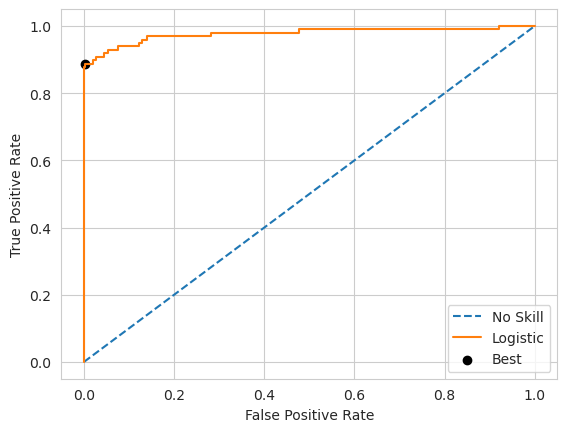

In [23]:
# predict probabilities
y_pred_prob = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [24]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0, y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(roc_auc_score(y_test, y_class),4)


imb = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4), round(log_reg.best_score_,4),AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imb

[[56754   110]
 [   12    86]]
Sensitivity: 	0.878
Specificity: 	0.998


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938


## SVM

In [25]:
svc = SVC(probability=True,random_state = 42)

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("SVC", svc)
        ]

# compile pipeline
pipe_svc = Pipeline(steps)

# Support Vector Classifier 
params = {'SVC__C': [0.1], 'SVC__kernel': ['rbf']}

# create 10 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

grid_svc = RandomizedSearchCV(estimator=pipe_svc, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)
grid_svc.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
grid_svc.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('SVC', SVC(C=0.1, probability=True, random_state=42))])

In [26]:
# print best hyperparameters
print("Best ROC_AUC for SVM: ", grid_svc.best_score_)
print("Best hyperparameters for SVM: ", grid_svc.best_params_)

Best ROC_AUC for SVM:  0.9571264048091734
Best hyperparameters for SVM:  {'SVC__kernel': 'rbf', 'SVC__C': 0.1}


Best Threshold=0.000896


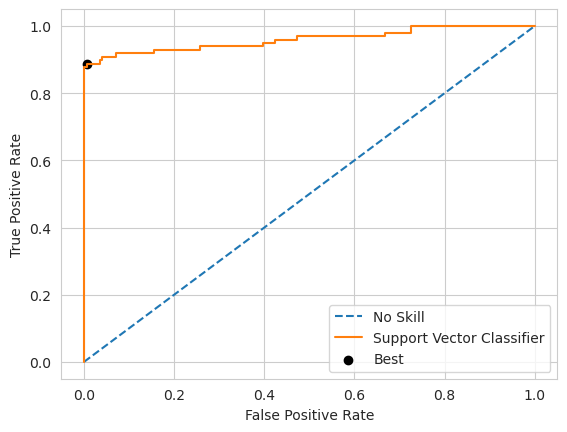

In [27]:
# predict probabilities
y_pred_prob = grid_svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [28]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(roc_auc_score(y_test, y_class),4)

model_results = pd.DataFrame([['SVC',round(sensitivity,4), round(specificity,4), round(grid_svc.best_score_,4),AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imb = imb.append(model_results, ignore_index = True)
imb

[[56467   397]
 [   12    86]]
Sensitivity: 	0.878
Specificity: 	0.993


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938
1,SVC,0.878,0.993,0.957,0.935


## KNN

In [29]:
knn = KNeighborsClassifier()

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("KNN", knn)
        ]

# compile pipeline
pipe_svc = Pipeline(steps)


# KNN Classifier 
params = {'KNN__n_neighbors': [23]}

# create 5 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

grid_knn = RandomizedSearchCV(estimator=pipe_svc, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('KNN', KNeighborsClassifier())]),
                   n_jobs=-1, param_distributions={'KNN__n_neighbors': [23]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [30]:
# We automatically get the logistic regression with the best parameters.
grid_knn.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('KNN', KNeighborsClassifier(n_neighbors=23))])

In [31]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_knn.best_score_)
print("Best hyperparameters: ", grid_knn.best_params_)

Best ROC_AUC:  0.93376885350253
Best hyperparameters:  {'KNN__n_neighbors': 23}


Best Threshold=0.086957


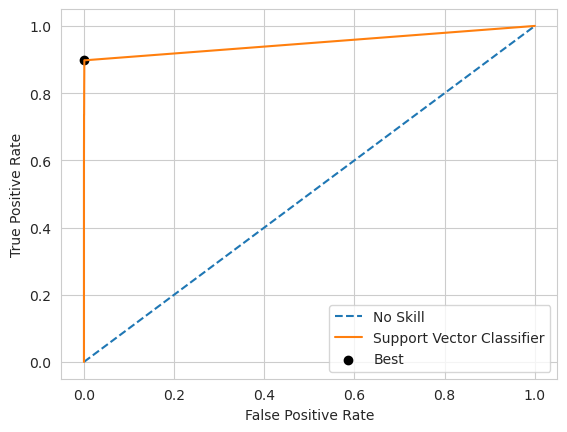

In [32]:
# predict probabilities
y_pred_prob = grid_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [33]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(roc_auc_score(y_test, y_class),4)

model_results = pd.DataFrame([['KNN',round(sensitivity,4), round(specificity,4), round(grid_knn.best_score_,4),AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imb = imb.append(model_results, ignore_index = True)
imb

[[56822    42]
 [   14    84]]
Sensitivity: 	0.857
Specificity: 	0.999


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938
1,SVC,0.878,0.993,0.957,0.935
2,KNN,0.857,0.999,0.934,0.928


## DECISION TREE

In [34]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [4,5],"dtree__min_samples_split": [74,75],
          "dtree__min_samples_leaf": [27,28]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
# Fit the grid search to the data
dtree_grid.fit(X_train,y_train)
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('pt', PowerTransformer()),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=27,
                                        min_samples_split=74,
                                        random_state=42))])

In [35]:
# print best hyperparameters
print("Best ROC_AUC: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best ROC_AUC:  0.9424096841562019
Best hyperparameters:  {'dtree__min_samples_split': 74, 'dtree__min_samples_leaf': 27, 'dtree__max_depth': 4, 'dtree__criterion': 'entropy'}


Best Threshold=0.010843


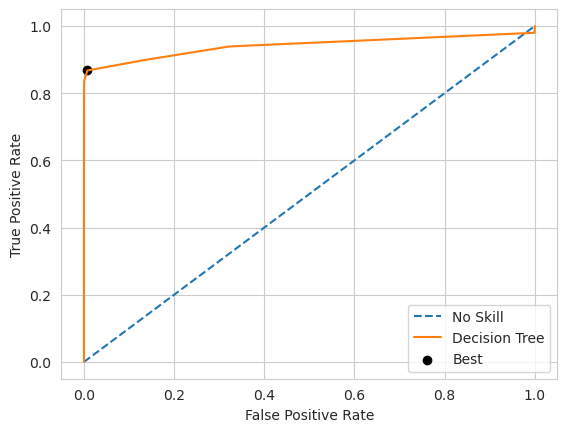

In [36]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [37]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round(dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imb = imb.append(model_results, ignore_index = True)
imb

[[56826    38]
 [   16    82]]
Sensitivity: 	0.84
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938
1,SVC,0.878,0.993,0.957,0.935
2,KNN,0.857,0.999,0.934,0.928
3,Decision Tree,0.837,0.999,0.942,0.918


## RANDOM FOREST

In [38]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('rf', RandomForestClassifier(random_state=42))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [100,120],
         "rf__min_samples_leaf": [5,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# create gridsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42)
# Fit the grid search to the data
rf_grid.fit(X_train,y_train)

# We automatically get the random forest with the best parameters.
rf_grid.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


Pipeline(steps=[('pt', PowerTransformer()),
                ('rf',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_leaf=10,
                                        random_state=42))])

In [39]:
# print best hyperparameters
print("Best ROC_AUC: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Best ROC_AUC:  0.9672028359203402
Best hyperparameters:  {'rf__n_estimators': 100, 'rf__min_samples_leaf': 10, 'rf__criterion': 'entropy'}


Best Threshold=0.002873


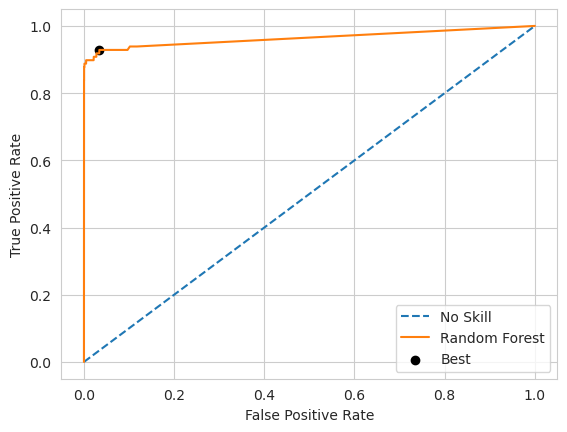

In [40]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [41]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),3)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4), round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imb = imb.append(model_results, ignore_index = True)
imb

[[54929  1935]
 [    8    90]]
Sensitivity: 	0.92
Specificity: 	0.97


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938
1,SVC,0.878,0.993,0.957,0.935
2,KNN,0.857,0.999,0.934,0.928
3,Decision Tree,0.837,0.999,0.942,0.918
4,Random Forest,0.918,0.966,0.967,0.942


## XGBOOST

In [42]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), 
                 ('xgb', XGBClassifier(n_estimators=500, 
                                       objective='binary:logistic'))])

params = {
        "xgb__gamma": [0.06,0.07],
        "xgb__max_depth": [7,8],
        "xgb__learning_rate": [0.1,0.2],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, random_state=42)
# fitting the model
xgb_random.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


Pipeline(steps=[('pt', PowerTransformer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.06, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                         

In [43]:
# print best hyperparameters
print("Best ROC_AUC: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best ROC_AUC:  0.9808044146477849
Best hyperparameters:  {'xgb__max_depth': 7, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.06}


Best Threshold=0.000095


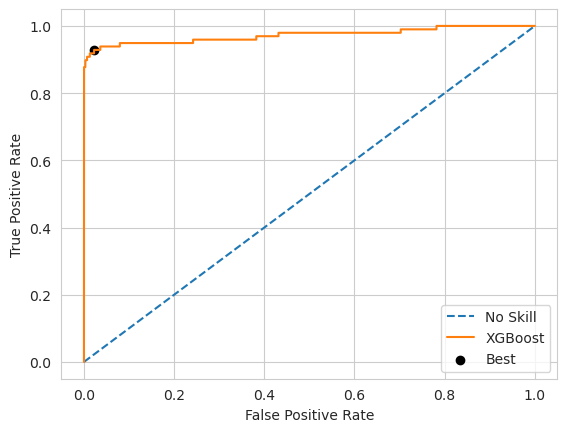

In [44]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [45]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),3)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
imb = imb.append(model_results, ignore_index = True)
imb

[[55585  1279]
 [    8    90]]
Sensitivity: 	0.92
Specificity: 	0.98


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938
1,SVC,0.878,0.993,0.957,0.935
2,KNN,0.857,0.999,0.934,0.928
3,Decision Tree,0.837,0.999,0.942,0.918
4,Random Forest,0.918,0.966,0.967,0.942
5,XGBoost,0.918,0.978,0.981,0.948


In [47]:
# print("Results on Imbalanced Dataset:")
imb

,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.878,0.998,0.981,0.938
1,SVC,0.878,0.993,0.957,0.935
2,KNN,0.857,0.999,0.934,0.928
3,Decision Tree,0.837,0.999,0.942,0.918
4,Random Forest,0.918,0.966,0.967,0.942
5,XGBoost,0.918,0.978,0.981,0.948
